# Training Ultralytics YOLOv11 Object Detection on Google Colab

This notebook shows how to train Ultralytics YOLOv11 Object Detector using a custom dataset.

This is done using the Google Colab infrastructure, which provides us some key features like:

- ability to run processes on GPU, essential to be able to train computer vision models.

- storage in Google Drive, where our data will be stored, both the dataset and the checkpoint of the trained model.

SOURCE: https://medium.com/@estebanuri/training-yolov11-object-detector-on-a-custom-dataset-39bba09530ff

# 1. Installing Ultralytics



In [ ]:
# Install ultralytics package.
!pip install -qq ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.9 MB/s eta 0:00:00


In [2]:
# Check that the package has been installed
import ultralytics

print(ultralytics.__version__)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.167


In [3]:
# When the package gets installed we can run the yolo cli command.
# the yolo settings shows us how is the package configured, and some
# important directories paths, like:
# - datasets_dir: where the datasets are expected to be stored, and
# - runs_dir: where the processes are going to store its results
#             (like the resulting training files)

!yolo settings

JSONDict("/root/.config/Ultralytics/settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "/content/datasets",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": false,
  "wandb": false,
  "vscode_msg": true,
  "openvino_msg": true
}
💡 Learn more about Ultralytics Settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings


# 2. Preparing the dataset

In [ ]:
# First of all, let's mount Google Drive.
# When running this cell, a pop up will appear asking
# you to grant access to your Google Drive drive.

# This way the training process will be able to store the progress
# into your google drive.

from google.colab import drive

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Create a folder into your Google Drive.
# This folder will be the working directory.
# Then point the DRIVE_WORKING_DIR variable to the path of this directory.

# In my case is:
DRIVE_ROOT_DIR = "/content/drive/MyDrive/Colab\Notebooks/THESIS/data"
!ls -lh {DRIVE_ROOT_DIR}

total 57M
drwx------ 2 root root 4.0K May  6 08:16 dataset_4600_et_3c
drwx------ 2 root root 4.0K Apr 18 19:06 dataset5402
drwx------ 2 root root 4.0K Apr 18 19:06 dataset6674
drwx------ 2 root root 4.0K Apr  5 12:42 dataset9400
drwx------ 2 root root 4.0K May  5 20:47 roboflow_2c_combined_et
drwx------ 2 root root 4.0K May  5 18:00 roboflow_bvono
drwx------ 2 root root 4.0K May  5 18:23 roboflow_dataset_2_classes_et
drwx------ 2 root root 4.0K May  5 18:16 roboflow_dataset_3_classes_2noom
drwx------ 2 root root 4.0K Apr 22 17:57 runs
-rw------- 1 root root  50M Apr 22 17:57 yolov8m.pt
-rw------- 1 root root 6.3M Apr 22 17:59 yolov8n.pt


In [6]:
# define working dir
DRIVE_WORKING_DIR = f"{DRIVE_ROOT_DIR}/roboflow_2c_combined_et"

In [7]:
# Let's change the working directory
%cd {DRIVE_WORKING_DIR}

/content/drive/MyDrive/Colab Notebooks/THESIS/data/roboflow_2c_combined_et


## Custom dataset

Or you can use your own dataset, the procedure is exactly the same, as long as it is formatted for YOLO.


In [8]:
# I've uploaded the zipped dataset into my Google Drive folder:
!ls -lh *.zip

-rw------- 1 root root 248M May  5 20:47 roboflow_2c_combined_et.zip


In [ ]:
# decompress the zip to the hard drive instance
# for training it is faster to place the files into the Colab instance
# hard drive, avoiding network latencies.

!unzip -o -qq 'roboflow_2c_combined_et.zip' -d /content/datasets

In [11]:
# dataset files should be on /content/datasets:

!ls /content/datasets/roboflow_3c_combined_et

data.yaml  README.dataset.txt  README.roboflow.txt  train  valid


In [ ]:
# This script prints the dataset structure in a tree-like format.

import os


def count_files(dir_path, extensions):
    return sum(
        1
        for f in os.listdir(dir_path)
        if os.path.isfile(os.path.join(dir_path, f))
        and os.path.splitext(f)[1].lower() in extensions
    )


def count_image_files(dir_path):
    # Define common image extensions
    image_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".tiff", ".gif"}
    return count_files(dir_path, image_extensions)


def count_label_files(dir_path):
    # Define common label extensions
    label_extensions = {".txt", ".xml"}
    return count_files(dir_path, label_extensions)


def print_dataset_structure(root_dir, indent="", is_last=True):
    """
    Prints the dataset structure in a tree-like format.

    Inputs:
      root_dir: str (path where a dataset is placed)


    """
    # Print the root directory
    if indent == "":
        print(root_dir)

    # Get sorted directory contents
    items = sorted(os.listdir(root_dir))
    items_count = len(items)

    for i, item in enumerate(items):
        item_path = os.path.join(root_dir, item)
        is_item_last = i == items_count - 1  # Check if the item is the last one

        # Determine prefix
        prefix = "└── " if is_item_last else "├── "
        next_indent = indent + ("    " if is_item_last else "│   ")

        if item == ".DS_Store":
            pass

        elif os.path.isdir(item_path):
            # Print directory name
            print(f"{indent}{prefix}{item}")
            # Recurse into subdirectory
            subdirs = sorted(os.listdir(item_path))
            for j, sub in enumerate(subdirs):
                sub_path = os.path.join(item_path, sub)
                if os.path.isdir(sub_path):
                    img_count = count_image_files(sub_path)
                    lbl_count = count_label_files(sub_path)
                    sub_prefix = "└── " if j == len(subdirs) - 1 else "├── "
                    found = []
                    if img_count > 0:
                        found.append(f"{img_count} images")
                    if lbl_count > 0:
                        found.append(f"{lbl_count} labels")
                    if len(found) == 0:
                        count = ""
                    else:
                        count = "[" + ", ".join(found) + "]"
                    print(f"{next_indent}{sub_prefix}{sub} {count}")
        else:
            print(f"{indent}{prefix}{item}")

In [14]:
print_dataset_structure("/content/datasets/roboflow_3c_combined_et")

/content/datasets/roboflow_3c_combined_et
├── README.dataset.txt
├── README.roboflow.txt
├── data.yaml
├── train
│   ├── images [7924 images]
│   └── labels [6720 labels]
└── valid
    ├── images [831 images]
    └── labels [831 labels]


In [15]:
# The data.yaml file, defines some dataset parameters, such as
# split file paths, and classnames:

!cat /content/datasets/roboflow_3c_combined_et/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['Bomb', 'Fruit']

roboflow:
  workspace: fruit-ninja-mumar
  project: fruit-ninja-fruits-bombs-2c
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/fruit-ninja-mumar/fruit-ninja-fruits-bombs-2c/dataset/1

# roboflow:
#   workspace: fruit-ninja-mumar
#   project: fruit-ninja-fruits-bombs
#   version: 4
#   license: CC BY 4.0
#   url: https://universe.roboflow.com/fruit-ninja-mumar/fruit-ninja-fruits-bombs/dataset/4

## Visualizing Some Examples

When we work with a dataset it is always convenient to visualize some examples to see what they look like.

It is also advisable to check if the labels are correct and are in the format we expect.

The following functions allow us to plot some images and their corresponding labels:

In [ ]:
import cv2
from matplotlib.patches import Rectangle
from matplotlib import pyplot as plt
import numpy as np
from glob import glob
import os

In [ ]:
def read_labels(file_name):
    """
    Reads a label file
    """

    with open(file_name, "r") as f:
        lines = f.read().splitlines()

    labels = []
    for line in lines:
        label = [float(n) for n in line.split(" ")]
        label = int(label[0]), label[1:]
        labels.append(label)
    return labels


def plot(rgb, labels, class_names=["bomb", "fruit"]):
    """
    Given an RGB image and its labels,
    plots the image with the bounding boxes.
    """

    plt.figure(figsize=(18, 8))
    plt.imshow(rgb)

    img_w, img_h = rgb.shape[1], rgb.shape[0]

    ax = plt.gca()
    for label in labels:
        class_id, bbox = label
        cx, cy, w, h = bbox

        cx = img_w * cx
        cy = img_h * cy
        w = img_w * w
        h = img_h * h

        hw = w / 2
        hh = h / 2

        pt = (cx - hw, cy - hh)

        if class_id == 0:
            color = "blue"
        else:
            color = "red"

        ax.add_patch(Rectangle(pt, w, h, edgecolor=color, fill=None))

        # Add class label above the bounding box
        label_text = class_names[int(class_id)]
        label_position = (cx - hw, cy - hh - 5)  # Slightly above the bbox
        ax.text(
            label_position[0],
            label_position[1],
            label_text,
            color=color,
            fontsize=12,
            fontweight="bold",
            bbox=dict(facecolor="white", edgecolor=color, alpha=0.7),
        )

    plt.show()

In [ ]:
import glob
import numpy as np


def sample_some(data_root, split=None, n=10, seed=1234):
    """

    Randomly samples a specified number of label and corresponding image files from a dataset.

    Parameters:
    -----------
    data_root : str.
        The root directory of the dataset.
    split : str, optional
        The split or subfolder within the `labels` directory to sample from. Defaults to `None`,
        which matches all subdirectories (i.e., "**").
    n : int, optional
        The number of label files to sample. Defaults to 10.
    seed : int, optional
        The random seed for reproducibility. Defaults to 1234.

    Returns:
    --------
    img_files : list of str
        A list of file paths to the corresponding image files in the `images` subdirectory.
    lbl_files : list of str
        A list of file paths to the sampled label files in the `labels` subdirectory.

    """

    np.random.seed(seed)

    if split is None:
        split = "**"

    pattern = os.path.join(data_root, f"{split}/labels/*.txt")
    label_files = sorted(glob.glob(pattern))

    lbl_files = np.random.choice(label_files, n, replace=False)
    lbl_files = list(lbl_files)

    img_files = [
        f.replace("labels", "images").replace(".txt", ".jpg") for f in lbl_files
    ]

    return img_files, lbl_files

In [ ]:
img_files, lbl_files = sample_some(
    data_root="/content/datasets/roboflow_3c_combined_et", split="train", n=3, seed=42
)

In [22]:
img_files

['/content/datasets/roboflow_3c_combined_et/train/images/Neon-Scene-Camera-v1-ps1_mp4-0018_jpg.rf.cf5e7768dbe5b5be786df03cd43fc342.jpg',
 '/content/datasets/roboflow_3c_combined_et/train/images/2024-06-17_13-53-29-807af32d_867b479f_0_0-1306_97_mp4-0528_jpg.rf.660c2510ed26a134d14c2490f05ffc56.jpg',
 '/content/datasets/roboflow_3c_combined_et/train/images/2024-03-27_11-19-10-d39c49e2_365a25a9_0_0-1061_854_mp4-0201_jpg.rf.72784e6d5a67a80ecb75d7c7111f9cca.jpg']

In [23]:
lbl_files

[np.str_('/content/datasets/roboflow_3c_combined_et/train/labels/Neon-Scene-Camera-v1-ps1_mp4-0018_jpg.rf.cf5e7768dbe5b5be786df03cd43fc342.txt'),
 np.str_('/content/datasets/roboflow_3c_combined_et/train/labels/2024-06-17_13-53-29-807af32d_867b479f_0_0-1306_97_mp4-0528_jpg.rf.660c2510ed26a134d14c2490f05ffc56.txt'),
 np.str_('/content/datasets/roboflow_3c_combined_et/train/labels/2024-03-27_11-19-10-d39c49e2_365a25a9_0_0-1061_854_mp4-0201_jpg.rf.72784e6d5a67a80ecb75d7c7111f9cca.txt')]

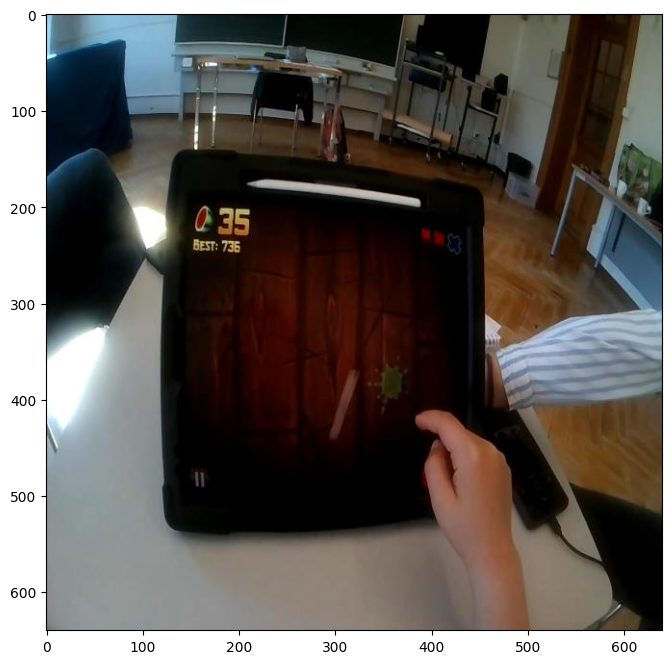

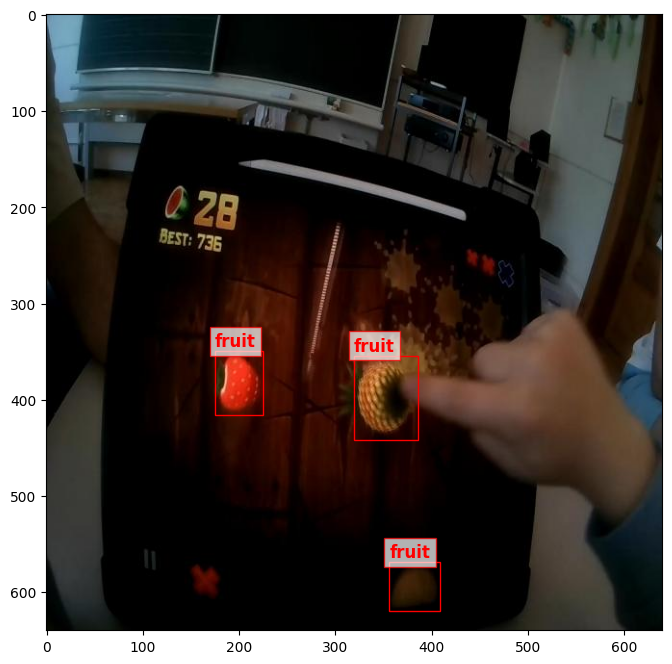

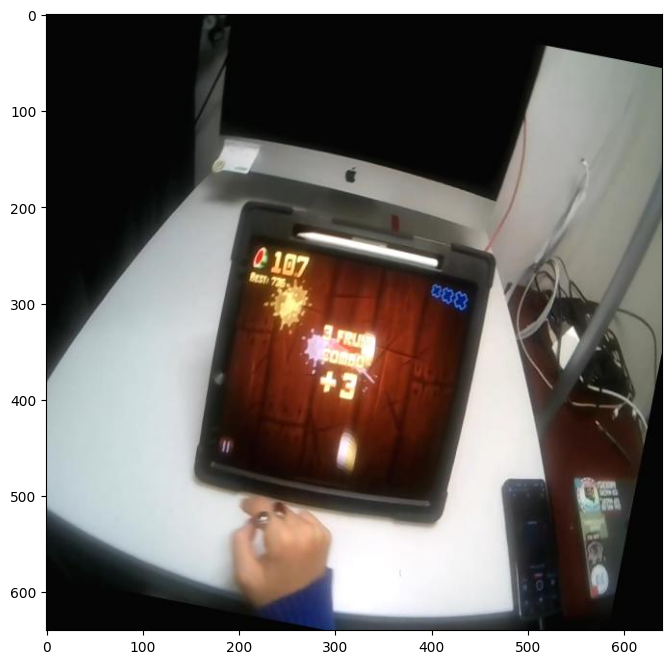

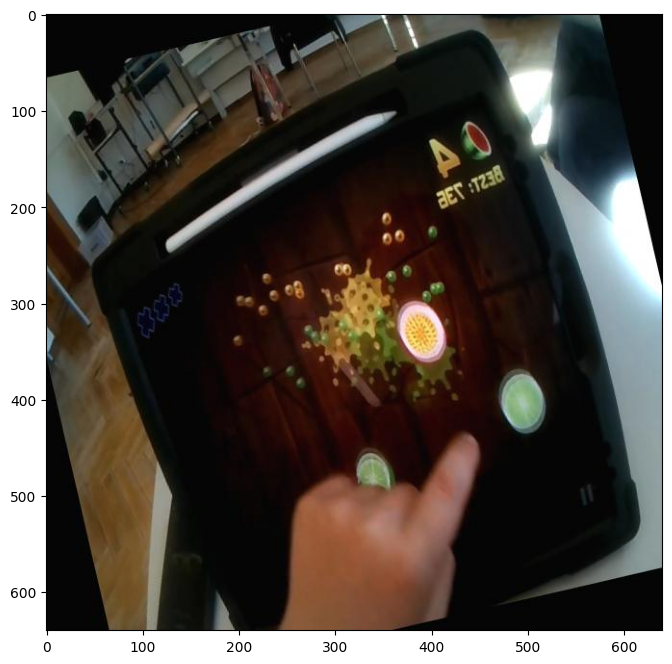

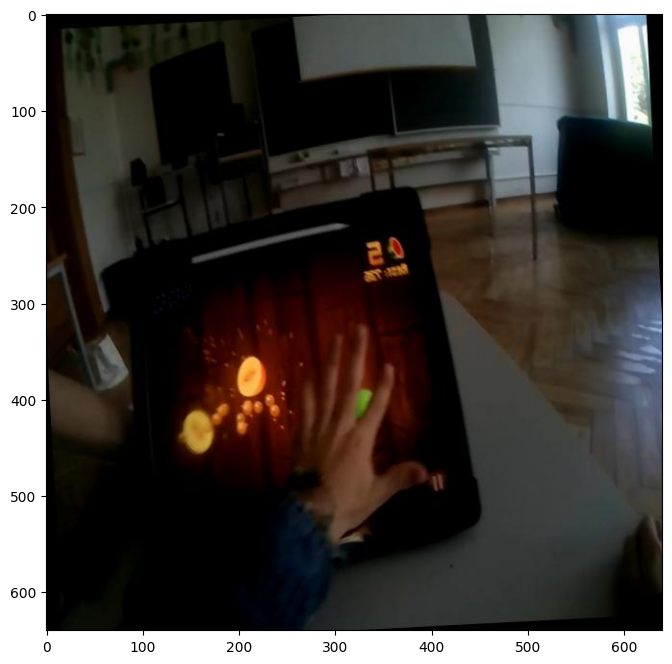

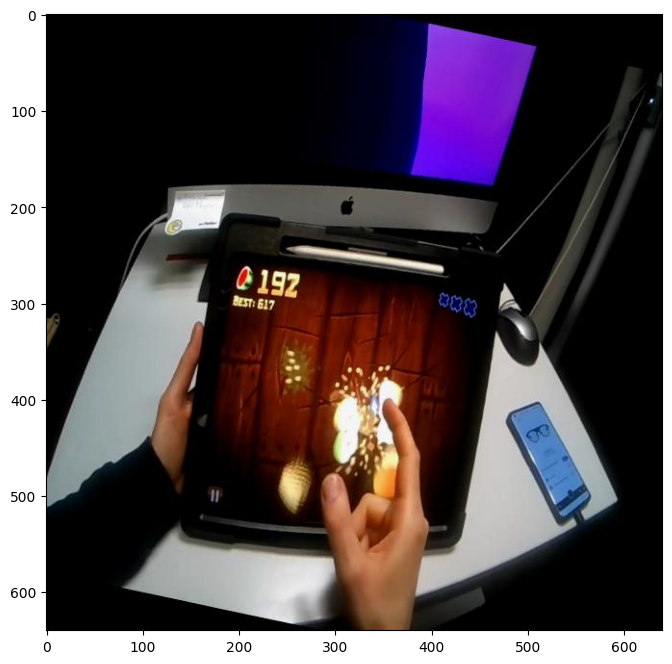

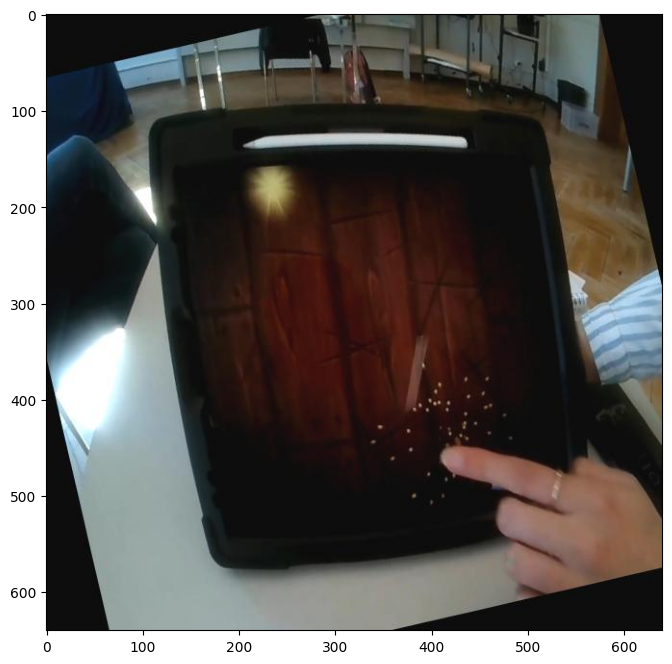

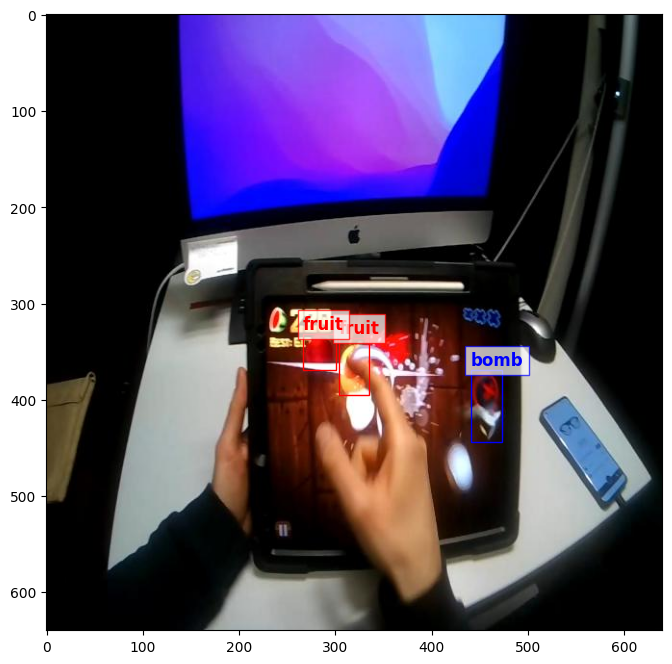

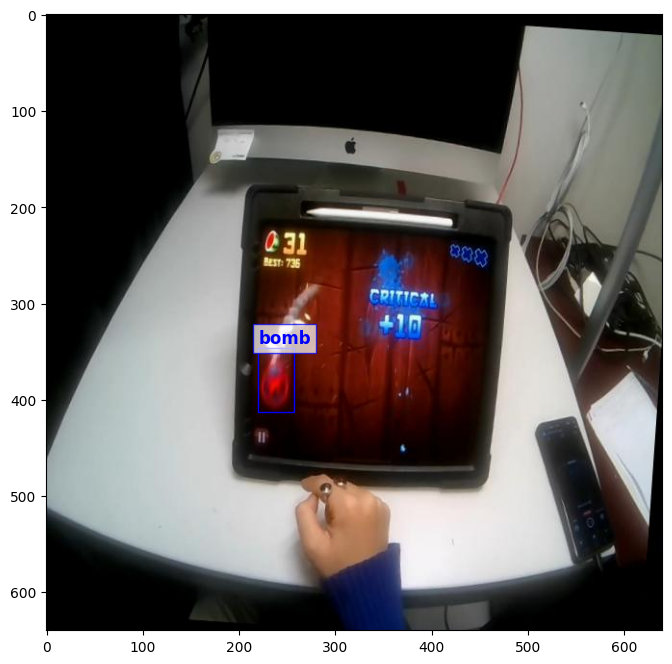

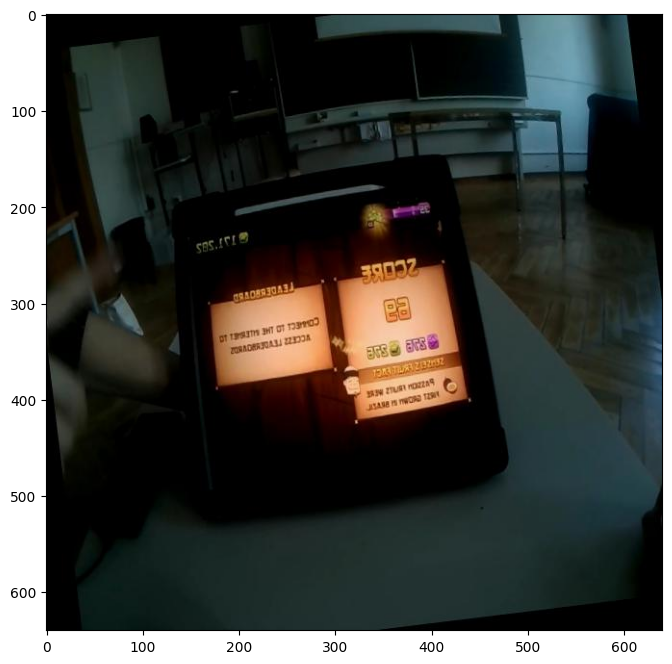

In [ ]:
# choose some random files
data_root = "/content/datasets/roboflow_3c_combined_et"
samples = sample_some(data_root)

for image_file, label_file in zip(*samples):

    image = cv2.imread(image_file)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    labels = read_labels(label_file)

    plot(rgb, labels)

# 3. Training the model

Training the model requires intensive computation provided by GPUs. Theoretically we can train on CPU but it would take a long time. Therefore it is important to have a GPU to train. However, for data preparation and evaluation of results we can use CPU which is much less expensive. Therefore, the recommendation is to use GPU only during training.

In [25]:
import torch

cuda_available = torch.cuda.is_available()

if cuda_available:

  print("CUDA is available")
  !nvidia-smi

else:

  message = """
    WARNING: In order to train the model, it is advisable to use GPU.
    Change runtime type to GPU from:
      menu Runtime -> Change runtime type -> Hardware accelerator -> GPU.
      And run all the cells again.
  """
  print(message)

CUDA is available
Thu Jul 17 09:09:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   36C    P8             12W /   72W |       3MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------

In [26]:
!pwd

/content/drive/MyDrive/Colab Notebooks/THESIS/data/roboflow_2c_combined_et


In [ ]:
def serialized_model_file(
    checkpoint="best",
    use_run="train",
):
    """
    Returns the serialized file path.
    """
    return f"runs/detect/{use_run}/weights/{checkpoint}.pt"

In [ ]:
#### TRAINING BLOCK ####
import os
from ultralytics import YOLO


def train(
    data,
    use_run="train",
    fallback="yolov8s.pt",  # "yolo11l.pt" or "/content/best.pt"
    epochs=50,
    augment=True,
    patience=50,
):

    cuda_available = torch.cuda.is_available()
    if not cuda_available:
        print("CUDA is not available, skipping train.")
        return

    model_file = serialized_model_file("last", use_run)

    if os.path.exists(model_file):
        resume_training = True
        use_model = model_file
    else:
        resume_training = False
        use_model = fallback

    model = YOLO(use_model)

    model.train(
        data=data,
        resume=resume_training,
        epochs=epochs,
        optimizer="AdamW",
        lr0=0.0001,
        imgsz=640,
        batch=16,
        augment=augment,
    )

In [ ]:
train(
    data="/content/datasets/roboflow_3c_combined_et/data.yaml",
    use_run=None,
    epochs=1,
    patience=50,
)

100%|██████████| 21.5M/21.5M [00:00<00:00, 44.2MB/s]

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)


engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/roboflow_3c_combined_et/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=None, rect=False, resume=Fals

100%|██████████| 755k/755k [00:00<00:00, 126MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

Model summary: 129 layers, 11,136,374 parameters, 11,136,358 gradients, 28.6 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 80.9±53.7 MB/s, size: 24.3 KB)


train: Scanning /content/datasets/roboflow_3c_combined_et/train/labels... 6720 images, 4708 backgrounds, 0 corrupt: 100%|██████████| 7924/7924 [00:04<00:00, 1972.39it/s]


train: New cache created: /content/datasets/roboflow_3c_combined_et/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 930.9±428.5 MB/s, size: 29.8 KB)


val: Scanning /content/datasets/roboflow_3c_combined_et/valid/labels... 831 images, 388 backgrounds, 0 corrupt: 100%|██████████| 831/831 [00:00<00:00, 1649.43it/s]


val: New cache created: /content/datasets/roboflow_3c_combined_et/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.0001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      3.63G      1.576      5.149      1.348         19        640:   9%|▉         | 44/496 [00:08<01:28,  5.09it/s]


KeyboardInterrupt: 

In [ ]:
!yolo settings

# 4. Reviewing Training Results

After training we will find some resulting files into the runs directory:

## checking results into the "runs" directory

Ultralytics package creates the "runs" directory, where the results are stored. Since we are training an object detector, the detect/train directory is created:

If we train again with different configurations, new directories train2, train3, train4… will be created, unless we resume training. If we resume training, the corresponding directories are re-used.

In [ ]:
!ls -l runs/detect/train3

### Training history

we can observe, a sharp worsening jump in the loss curves, and after that the model starts improving. One possible explanation is as follows: My dataset is a sub-set of COCO, the pre-trained weights at start were created  using the same images, so the model already knew how to detect cats and dogs. Surely I started with a very high learning rate, destroying the previous learned knowledge? Should I start with a much lower learning rate? or perhaps should I freeze the first layers, to avoid this effect and achieve much faster convergence?

In [ ]:
from PIL import Image

Image.open("runs/detect/train3/results.png")

### args.yaml

Into the `args.yaml` file we can check the running arguments, like total number of epochs, enabled augmentations, etc.

Check its contents to see which parameters were used for this experiment.

In [ ]:
!cat runs/detect/train3/args.yaml

### checkpoint files

On the weights directory we can find the PyTorch serialized checkpoints files:
- best.pt
- last.pt

These files contain the model weights as well as the training state, so that we can continue training from these serialized files. Use last.pt for continue training, and best.pt for production.

In [ ]:
!ls -lh runs/detect/train3/weights

### Batch visualizations

The files like `train_batch#.jpg` and `val_batch_pred#.jpg` are grids of batch images and its corresponding bounding boxes:

#### Training Visualization
here is a training batch visualization.
Note the applied augmentation transformations like mosaic, flip, and intensities shifts.

In [ ]:
Image.open("runs/detect/train3/train_batch0.jpg")

#### Validation Visualization
here is a validation batch visualization. We can see the predicted bounding boxes, each one with its corresponding class and prediction confidence.

In [ ]:
Image.open("runs/detect/train3/val_batch0_pred.jpg")

### PR_curve.png

Precision-Recall plot which helps us evaluate the object detector by showing the trade-off between precision and recall across different thresholds.

By analyzing the PR curve, we can choose confidence thresholds that align with the specific goals of your application, such as prioritizing precision (e.g., for safety-critical tasks) or recall (e.g., for exhaustive search tasks).


In [ ]:
Image.open("runs/detect/train3/PR_curve.png")

### confusion_matrix.png

A confusion matrix in object detection is useful for analyzing how well the model distinguishes between object classes (e.g., cat vs. dog) and background, highlighting misclassifications and false positives/negatives at a glance.

By analyzing the confusion matrix, you can pinpoint which classes are most problematic, evaluate the balance between precision and recall, and identify areas where the model might need improvement, such as adjusting thresholds, augmenting the dataset, or fine-tuning the training process.

In this case, with a simple glance we see that the weakest point of the model is its False Negatives, that is, cases where the model claims that there are cats or dogs, but according to the labels, they are not really there.

In [ ]:
Image.open("runs/detect/train3/confusion_matrix.png")